In [ ]:
!pip install XGBoost
!pip install catboost
!pip install optuna
!pip install LightGBM
!pip install optuna-integration[lightgbm]
import pandas as pd
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 9.5 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
df_m_train = pd.read_csv("train_Mortgage.csv")
df_p_train = pd.read_csv("train_Pension.csv")
df_s_train = pd.read_csv("train_Savings.csv")
target_name_1 = "Mortgage"
target_name_2 = "Pension"
target_name_3 = "Savings"
y_train_m = df_m_train[target_name_1]
y_train_p = df_p_train[target_name_2]
y_train_s = df_s_train[target_name_3]
X_train_m = df_m_train.drop(columns=[target_name_1])
X_train_p = df_p_train.drop(columns=[target_name_2])
X_train_s = df_s_train.drop(columns=[target_name_3])

In [ ]:
df_m_valid = pd.read_csv("val_Mortgage.csv")
df_p_valid = pd.read_csv("val_Pension.csv")
df_s_valid = pd.read_csv("val_Savings.csv")
y_test_m = df_m_valid[target_name_1]
y_test_p = df_p_valid[target_name_2]
y_test_s = df_s_valid[target_name_3]
X_test_m = df_m_valid.drop(columns=[target_name_1])
X_test_p = df_p_valid.drop(columns=[target_name_2])
X_test_s = df_s_valid.drop(columns=[target_name_3])

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    precision_score,
    recall_score,
    roc_curve,
)
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def evaluate_models(model_1, model_2, model_3, X_test, y_test,target, pos_label='yes'):
    """
    Вычисляет метрики и строит график AUC для модели CatBoostClassifier.

    Параметры:
        model1:
        model2:
        model3:
        X_test: Тестовые данные (признаки).
        y_test: Истинные значения целевой переменной.

    Возвращает:
        Словарь с метриками: accuracy, f1_score, roc_auc, precision, recall.
    """

    # Предсказание вероятностей и классов
    y_pred_proba_1 = model_1.predict_proba(X_test)[:, 1]  # Вероятности для положительного класса
    y_pred_1 = model_1.predict(X_test)  # Предсказанные классы
    y_pred_proba_2 = model_2.predict_proba(X_test)[:, 1]  # Вероятности для положительного класса
    y_pred_2 = model_2.predict(X_test)  # Предсказанные классы
    y_pred_proba_3 = model_3.predict_proba(X_test)[:, 1]  # Вероятности для положительного класса
    y_pred_3 = model_3.predict(X_test)  # Предсказанные классы

    fpr1, tpr1, _ = roc_curve(y_test, y_pred_proba_1)
    roc_auc_1 = auc(fpr1, tpr1)
    fpr2, tpr2, _ = roc_curve(y_test, y_pred_proba_2)
    roc_auc_2 = auc(fpr2, tpr2)
    fpr3, tpr3, _ = roc_curve(y_test, y_pred_proba_3)
    roc_auc_3 = auc(fpr3, tpr3)
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 7))
    sns.lineplot(x=fpr1, y=tpr1, label=f'LightGBM (AUC = {roc_auc_1:.6f})', color='blue')
    sns.lineplot(x=fpr2, y=tpr2, label=f'CatBoost (AUC = {roc_auc_2:.6f})', color='green')
    sns.lineplot(x=fpr3, y=tpr3, label=f'XGBoost (AUC = {roc_auc_3:.6f})', color='red')

    plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')

    # Настраиваем график
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC for ' + target)
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

class FeatureAttention(nn.Module):
    def __init__(self, input_dim, units):
        super(FeatureAttention, self).__init__()
        self.units = units
        self.query = nn.Linear(input_dim, units)
        self.key = nn.Linear(input_dim, units)
        self.value = nn.Linear(input_dim, units)
        self.attention_weights = None

    def forward(self, x):
        Q = self.query(x)
        K = self.key(x)
        V = self.value(x)

        attention_scores = torch.matmul(Q, K.transpose(-2, -1)) / torch.sqrt(torch.tensor(self.units, dtype=torch.float32))
        self.attention_weights = F.softmax(attention_scores, dim=-1)
        output = torch.matmul(self.attention_weights, V)
        return output

class FiNetWithAttention(nn.Module):
    def __init__(self, input_dim, num_blocks=3, hidden_units=64, dropout_rate=0.2):
        super(FiNetWithAttention, self).__init__()
        self.input_dim = input_dim
        self.num_blocks = num_blocks
        self.hidden_units = hidden_units

        self.embedding = nn.Sequential(
            nn.Linear(input_dim, hidden_units),
            nn.ReLU(),
            nn.LayerNorm(hidden_units)
        )

        self.blocks = nn.ModuleList()
        for _ in range(num_blocks):
            block = nn.ModuleDict({
                'attention': FeatureAttention(hidden_units, hidden_units),
                'dense1': nn.Linear(hidden_units, hidden_units),
                'dense2': nn.Linear(hidden_units, hidden_units),
                'ln': nn.LayerNorm(hidden_units),
                'dropout': nn.Dropout(dropout_rate)
            })
            self.blocks.append(block)

        self.output_layer = nn.Sequential(
            nn.Linear(hidden_units, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.embedding(x)

        for block in self.blocks:
            attn_out = block['attention'](x)
            attn_out = block['dense1'](attn_out)
            attn_out = F.relu(attn_out)

            x_interaction = x * attn_out
            x_interaction = block['dense2'](x_interaction)
            x_interaction = F.relu(x_interaction)

            x = x + x_interaction
            x = block['ln'](x)
            x = block['dropout'](x)

        return self.output_layer(x)

    def get_attention_weights(self):
        """Возвращает веса внимания из всех блоков"""
        return [block['attention'].attention_weights for block in self.blocks]

# Функция для подготовки данных
def prepare_data(X_train, y_train):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_train)

    # Convert target to float tensor (binary classification)
    y_tensor = torch.tensor(y_train.values.astype(np.float32)).view(-1, 1)
    X_tensor = torch.tensor(X_scaled, dtype=torch.float32)

    return X_tensor, y_tensor, scaler

# Инициализация моделей для каждой задачи
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

models = {
    'mortgage': FiNetWithAttention(X_train_m.shape[1]).to(device),
    'pension': FiNetWithAttention(X_train_p.shape[1]).to(device),
    'savings': FiNetWithAttention(X_train_s.shape[1]).to(device)
}

# Подготовка данных для каждой задачи
X_m, y_m, scaler_m = prepare_data(X_train_m, y_train_m)
X_p, y_p, scaler_p = prepare_data(X_train_p, y_train_p)
X_s, y_s, scaler_s = prepare_data(X_train_s, y_train_s)

# Создание DataLoader
batch_size = 64
train_m = TensorDataset(X_m, y_m)
train_p = TensorDataset(X_p, y_p)
train_s = TensorDataset(X_s, y_s)

train_loader_m = DataLoader(train_m, batch_size=batch_size, shuffle=True)
train_loader_p = DataLoader(train_p, batch_size=batch_size, shuffle=True)
train_loader_s = DataLoader(train_s, batch_size=batch_size, shuffle=True)

# Функция обучения для бинарной классификации
def train_model(model, train_loader, epochs=20):
    criterion = nn.BCELoss()  # Binary Cross Entropy Loss
    optimizer = torch.optim.Adam(model.parameters())

    model.train()
    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        total = 0

        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            predicted = (outputs > 0.5).float()
            correct += (predicted == y_batch).sum().item()
            total += y_batch.size(0)

        accuracy = 100 * correct / total
        print(f'Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}, Accuracy: {accuracy:.2f}%')

In [ ]:
# Обучение моделей
print("Training Mortgage model...")
train_model(models['mortgage'], train_loader_m)

print("\nTraining Pension model...")
train_model(models['pension'], train_loader_p)

print("\nTraining Savings model...")
train_model(models['savings'], train_loader_s)

# Функция для извлечения признаков (перед последним слоем)
def extract_features(model, X, scaler):
    X_scaled = scaler.transform(X)
    X_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)

    # Получаем выход перед последним Sigmoid слоем
    model.eval()
    with torch.no_grad():
        # Проходим через все слои, кроме последнего Sigmoid
        x = model.embedding(X_tensor)
        for block in model.blocks:
            attn_out = block['attention'](x)
            attn_out = block['dense1'](attn_out)
            attn_out = F.relu(attn_out)

            x_interaction = x * attn_out
            x_interaction = block['dense2'](x_interaction)
            x_interaction = F.relu(x_interaction)

            x = x + x_interaction
            x = block['ln'](x)
            x = block['dropout'](x)

        features = x.cpu().numpy()
    return features

# Извлечение признаков для бустинга
X_train_m_features = extract_features(models['mortgage'], X_train_m, scaler_m)
X_train_p_features = extract_features(models['pension'], X_train_p, scaler_p)
X_train_s_features = extract_features(models['savings'], X_train_s, scaler_s)

Training Mortgage model...
Epoch 1/20, Loss: 0.3259, Accuracy: 84.27%
Epoch 2/20, Loss: 0.2350, Accuracy: 88.69%
Epoch 3/20, Loss: 0.2219, Accuracy: 89.05%
Epoch 4/20, Loss: 0.2155, Accuracy: 89.37%
Epoch 5/20, Loss: 0.2115, Accuracy: 89.08%
Epoch 6/20, Loss: 0.2049, Accuracy: 89.79%
Epoch 7/20, Loss: 0.2068, Accuracy: 89.65%
Epoch 8/20, Loss: 0.1990, Accuracy: 89.87%
Epoch 9/20, Loss: 0.2023, Accuracy: 90.07%
Epoch 10/20, Loss: 0.2001, Accuracy: 89.88%
Epoch 11/20, Loss: 0.1950, Accuracy: 90.20%
Epoch 12/20, Loss: 0.1976, Accuracy: 90.05%
Epoch 13/20, Loss: 0.1926, Accuracy: 90.25%
Epoch 14/20, Loss: 0.1945, Accuracy: 89.88%
Epoch 15/20, Loss: 0.1926, Accuracy: 90.29%
Epoch 16/20, Loss: 0.1920, Accuracy: 90.47%
Epoch 17/20, Loss: 0.1914, Accuracy: 90.24%
Epoch 18/20, Loss: 0.1880, Accuracy: 90.54%
Epoch 19/20, Loss: 0.1880, Accuracy: 90.35%
Epoch 20/20, Loss: 0.1873, Accuracy: 90.64%

Training Pension model...
Epoch 1/20, Loss: 0.4920, Accuracy: 75.38%
Epoch 2/20, Loss: 0.4555, Accura

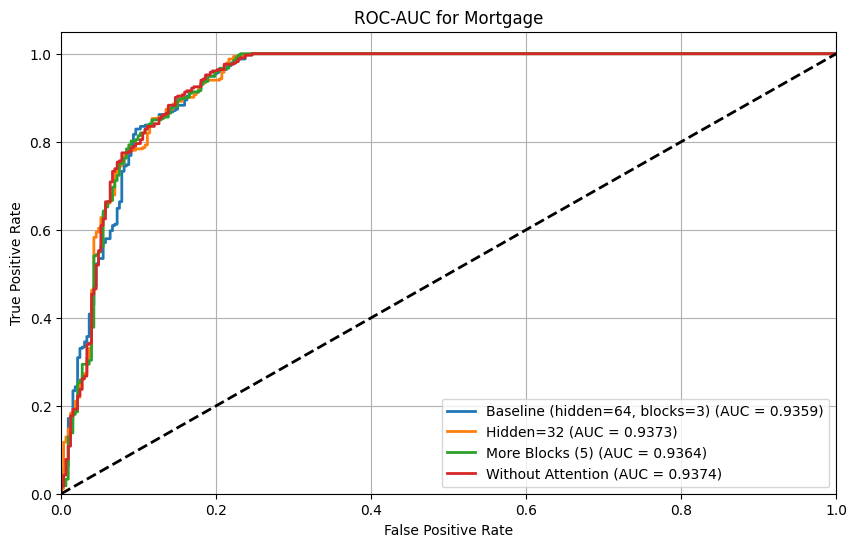

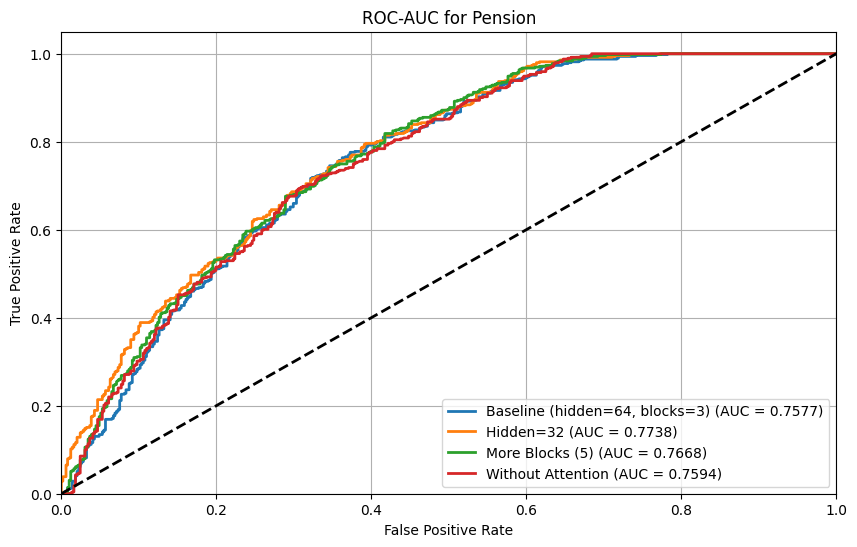

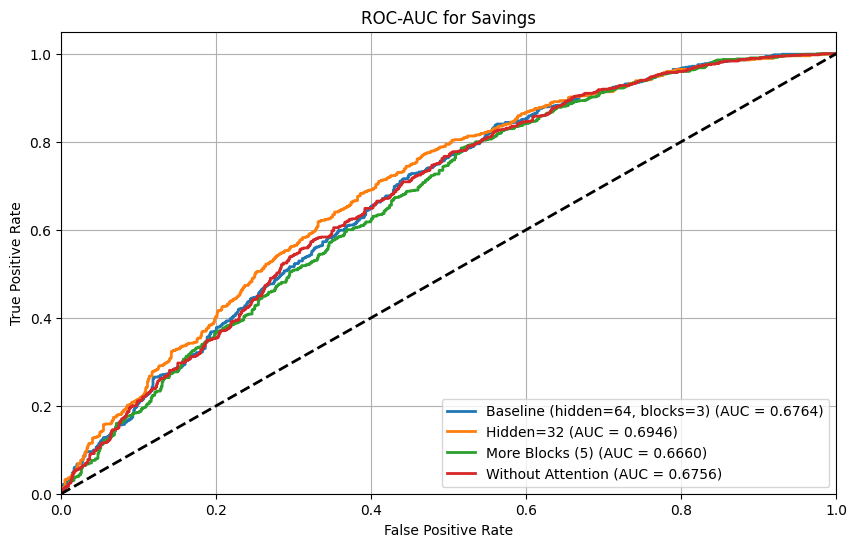

In [ ]:
# Конфигурации моделей для экспериментов
experiments = [
    {'name': 'Baseline (hidden=64, blocks=3)', 'hidden': 64, 'num_blocks': 3, 'use_attention': True},
    {'name': 'Hidden=32', 'hidden': 32, 'num_blocks': 3, 'use_attention': True},
    {'name': 'More Blocks (5)', 'hidden': 64, 'num_blocks': 5, 'use_attention': True},
    {'name': 'Without Attention', 'hidden': 64, 'num_blocks': 3, 'use_attention': False}
]

# Обучение и визуализация для каждого таргета
for target_name, data in datasets.items():
    plt.figure(figsize=(10, 6))

    for exp_config in experiments:
        # Отделяем параметры модели от названия эксперимента
        model_params = {k: v for k, v in exp_config.items() if k != 'name'}

        # Обучение модели
        preds = train_and_evaluate(
            data['X_train'], data['y_train'],
            data['X_val'], data['y_val'],
            params=model_params  # Передаем только параметры модели
        )

        # Расчет метрик
        fpr, tpr, _ = roc_curve(data['y_val'], preds)
        roc_auc = auc(fpr, tpr)

        # Построение кривой
        plt.plot(fpr, tpr,
                lw=2,
                label=f'{exp_config["name"]} (AUC = {roc_auc:.4f})')

    # Оформление графика
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC-AUC for {target_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

Как видим уменьшение числа слоёв положительно сказалось на результате для всех целевых признаков обеспечив прирост в 2-3 процента, отсутствие attention уменьштло точность лишь на пару тысячных, увеличения числа блоков негативно сказалась на результате. В совокупности получаем модель, обучающуюся примерно за тоже время, что svm (плюс минус 3 секунды) но дающая худшие результаты. Следовательно, лучше рассмотреть другуой вид модели